In [ ]:
# Install Kaggle Library
!pip install -q kaggle

# Upload kaggle.json (one-time setup, download this from your Kaggle account under 'API')
from google.colab import files
files.upload()  # Choose the kaggle.json file downloaded

# Make directory and move kaggle.json, set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download datamunge/sign-language-mnist

# Unzip the dataset
!unzip -q sign-language-mnist.zip


Saving kaggle.json to kaggle (1).json
sign-language-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: amer_sign3.png
error:  invalid response [amer_sign]
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [3.png]
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace amer_sign3.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace american_sign_language.PNG? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace sign_mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input/sign-language-mnist.zip
./input/kaggle (1).json
./input/sign_mnist_train.csv
./input/kaggle.json
./input/sign_mnist_test.csv
./input/amer_sign3.png
./input/amer_sign2.png
./input/american_sign_language.PNG
./input/sign_mnist_train/sign_mnist_train.csv
./input/sign_mnist_test/sign_mnist_test.csv


In [24]:
train_df = pd.read_csv("/content/input/sign_mnist_train.csv")
test_df = pd.read_csv("/content/input/sign_mnist_test.csv")

test = test_df.copy()
y = test['label']
train_df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [25]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [27]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

x_train = train_df.values
x_test = test_df.values

# Normalize the data
x_train = x_train / 255
x_test = x_test / 255

# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)



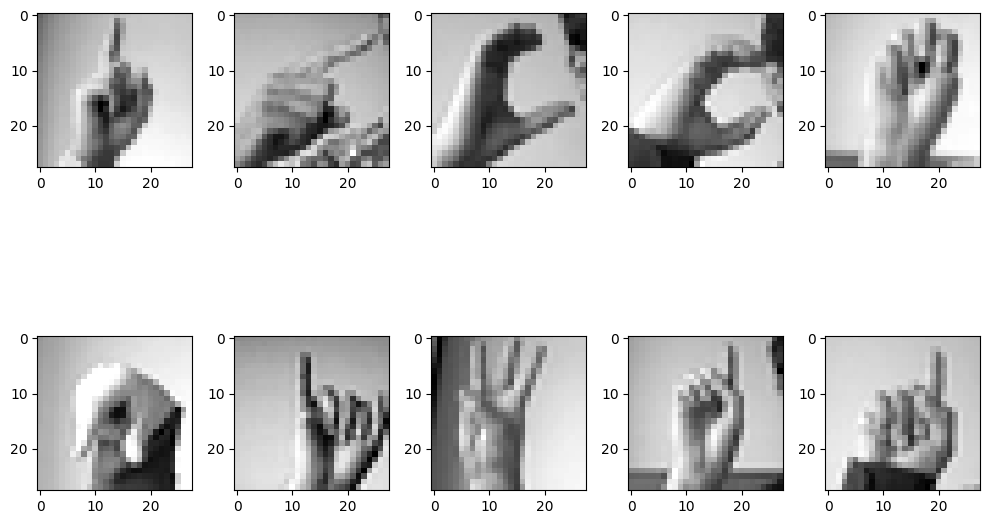

In [28]:
f, ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()



In [29]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [30]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [31]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 50)        2

In [32]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 117s 531ms/step - loss: 1.1247 - accuracy: 0.6474 - val_loss: 4.8118 - val_accuracy: 0.0488 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 121s 562ms/step - loss: 0.2212 - accuracy: 0.9284 - val_loss: 2.5284 - val_accuracy: 0.3390 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 107s 499ms/step - loss: 0.1089 - accuracy: 0.9643 - val_loss: 0.1843 - val_accuracy: 0.9320 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 107s 498ms/step - loss: 0.0686 - accuracy: 0.9774 - val_loss: 0.0258 - val_accuracy: 0.9939 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 105s 489ms/step - loss: 0.0485 - accuracy: 0.9848 - val_loss: 0.0484 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - ETA: 0s - loss: 0.0370 - accuracy: 0.9882
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 [========================

In [34]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 11s 49ms/step - loss: 0.0055 - accuracy: 0.9976
Accuracy of the model is -  99.76296424865723 %


In [33]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss= history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()


  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")

  plt.xlabel("Epochs")
  plt.legend();

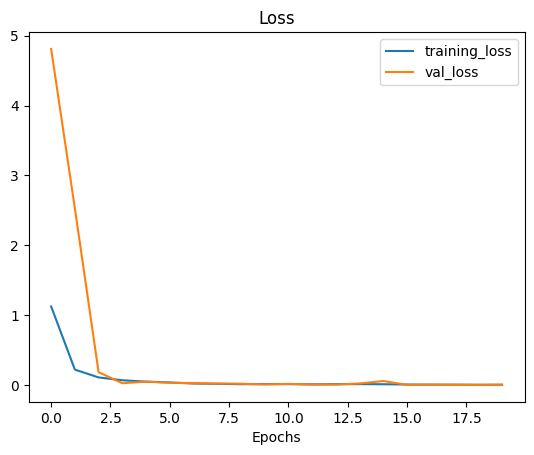

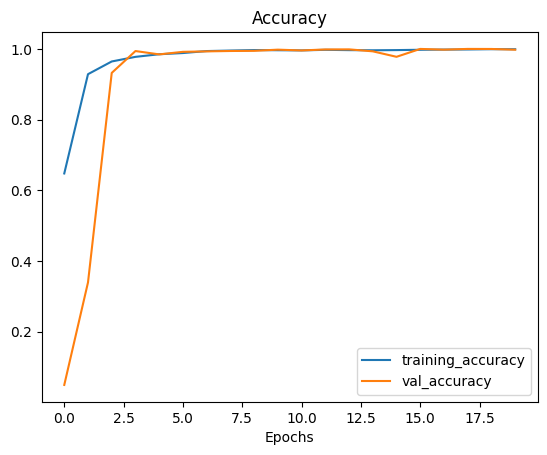

In [35]:
plot_loss_curves(history)